In [ ]:
GRIP TASK-2

PREDICTION USING UNSUPERVISED LEARNING ON IRIS DATASET
    Predict the optimal number of clusters on the given 'Iris' dataset and represent it visually.

AUTHOR:ADDURI SRAVANI

In [5]:
#import required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#load data

dataframe=pd.read_csv('iris.csv',index_col=0)
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#here,by using iloc function I have stored features columns in "feature" variable.
#target column in "target" variable 

feature=dataframe.iloc[:,[0,1,2,3]].values
print("features array")
print(feature)
target=dataframe.iloc[:,4].values
print("target classes")
print(set(target))

features array
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.

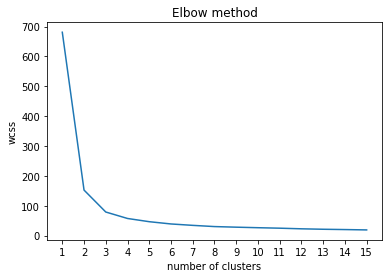

In [8]:
#performing elbow method to find the approximate number of clusters

from sklearn.cluster import KMeans
wcss=[] #within-cluster-sum-of-squares
for i in range(1,16):
    clusters=KMeans(n_clusters=i)
    clusters.fit(feature)
    wcss.append(clusters.inertia_)
plt.plot(range(1,16),wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.xticks(range(1,16))
plt.show()

In [9]:
#In the above graph we can see that there is a sharpe bending from 3 onwards.
#So,here I've taken number of clusters i.e k=3

clusters=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels=clusters.fit_predict(feature)
print(labels) #this array shows the predicted labels by k-means model. 


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


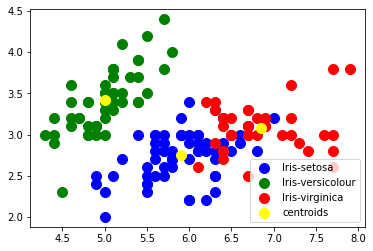

In [10]:
#scatter plot

plt.scatter(feature[labels==0,0], feature[labels==0,1], s=100, c='blue', label='Iris-setosa')
plt.scatter(feature[labels==1,0], feature[labels==1,1], s=100, c='green', label='Iris-versicolour')
plt.scatter(feature[labels==2,0], feature[labels==2,1], s=100, c='red', label='Iris-virginica')
plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], s=100, c='yellow', label='centroids')
plt.legend()

In [ ]:
#I've plotted the scatter plot which shows the datapoints that belong to each cluster.
#I've plotted the centroids on each cluster. 